## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata_path = "../data/Mouse_metadata.csv"
study_results_path = "../data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single datases
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
combined_data.head()

# Display the data table for preview
print(combined_data)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume  Metastatic Sites  
0        45.000000                 0  
1        38.825898                 0  
2        35.014271            

In [5]:
# Checking the number of mice.
pd.DataFrame({"Mouse ID" : [len(combined_data)]})

,Mouse ID
0,1893


In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

combined_data[combined_data['Mouse ID'].duplicated() == True].head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume,Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1
11,s185,Capomulin,Female,3,17,5,43.878496,0


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 



In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined = combined_data.drop_duplicates('Mouse ID')
clean_combined

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [9]:
# Checking the number of mice in the clean DataFrame.
pd.DataFrame({"Mouse ID" : [len(clean_combined)]})

,Mouse ID
0,249


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

reduced_data = combined_data.loc[:, ["Drug Regimen","Tumor Volume"]]
grp_data = reduced_data.groupby(['Drug Regimen'])

mean_df = pd.DataFrame(grp_data["Tumor Volume"].mean())
median_df = pd.DataFrame(grp_data["Tumor Volume"].median())
var_df = pd.DataFrame(grp_data["Tumor Volume"].var())
std_df = pd.DataFrame(grp_data["Tumor Volume"].std())
sem_df = pd.DataFrame(grp_data["Tumor Volume"].size().reset_index())

pd.DataFrame({"Mean" : mean_df['Tumor Volume'], 
              "Median" : median_df['Tumor Volume'],
               "Variance" : var_df['Tumor Volume'],
               "Standard Deviation" : std_df['Tumor Volume'],
               "SEM" : sem(sem_df['Tumor Volume'])
             },
            index = mean_df.index)

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,7.003253
Ceftamin,52.591172,51.776157,39.290177,6.268188,7.003253
Infubinol,52.884795,51.820584,43.128684,6.567243,7.003253
Ketapril,55.235638,53.698743,68.553577,8.279709,7.003253
Naftisol,54.331565,52.509285,66.173479,8.134708,7.003253
Placebo,54.033581,52.288934,61.168083,7.821003,7.003253
Propriva,52.322552,50.854632,42.351070,6.507770,7.003253
Ramicane,40.216745,40.673236,23.486704,4.846308,7.003253
Stelasyn,54.233149,52.431737,59.450562,7.710419,7.003253


The mean Tumor_Volume 50.448380631336505
The median Tumor_Volume is 48.95147442
The population variance is 79.07427999025795
The population standard deviation is 8.892372011463417


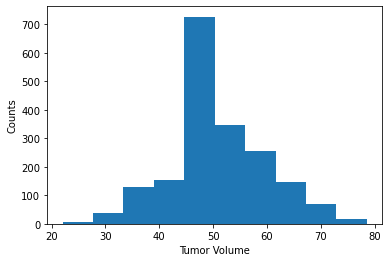

In [11]:
# Calculate the summary statistics and plot the histogram of the entire population data

Tumor_Volume = combined_data['Tumor Volume']

mean_numpy = np.mean(Tumor_Volume)
print(f"The mean Tumor_Volume {mean_numpy}")

median_numpy = np.median(Tumor_Volume)
print(f"The median Tumor_Volume is {median_numpy}")

var_numpy = np.var(Tumor_Volume,ddof = 0)
print(f"The population variance is {var_numpy}")

sd_numpy = np.std(Tumor_Volume,ddof = 0)
print(f"The population standard deviation is {sd_numpy}")

plt.hist(Tumor_Volume)
plt.xlabel('Tumor Volume')
plt.ylabel('Counts')
plt.show()

# Using the aggregation method, produce the same summary statistics in a single line

## Bar and Pie Charts

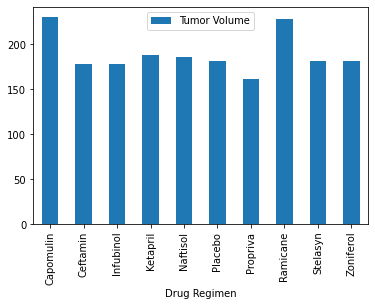

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

Drug_Regimen = grp_data['Tumor Volume'].size().index
Measurements = grp_data['Tumor Volume'].count()

bar_df = pd.DataFrame({'Drug Regimen' : Drug_Regimen, 
                      'Tumor Volume' : Measurements})

ax = bar_df.plot.bar(x='Drug Regimen', y='Tumor Volume', rot=90)

Text(0, 0.5, 'Tumor Volume')

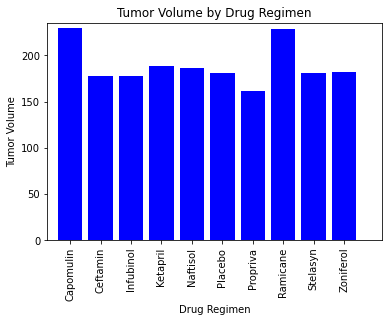

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

x_axis = np.arange(len(Measurements))

# Create a bar chart based upon the above data
plt.bar(x_axis, Measurements, color="b", align="center")



# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Drug_Regimen)
plt.xticks(rotation=90)

# Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)+0.25)

# Set the limits of the y axis
plt.ylim(0, max(Measurements)+5)

# Give our chart some labels and a tile
plt.title("Tumor Volume by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume")

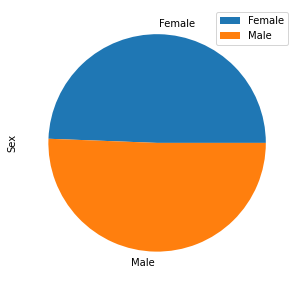

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# create a data frame holding only the female data
female_df = combined_data.loc[combined_data['Sex'] == "Female", :]
female_df.head()
# create a data frame holding only the male data
male_df = combined_data.loc[combined_data['Sex'] == "Male", :]
male_df.head()

pie_df = pd.DataFrame({'Sex' : [len(female_df), len(male_df)]},
                     index = ['Female', 'Male'])

ay = pie_df.plot.pie(y='Sex', figsize=(5,5))

([<matplotlib.patches.Wedge at 0x1e5f408f7f0>,
 [Text(-0.7230187918402546, -0.8290017048509964, 'Female'),
  Text(0.7230187918402547, 0.8290017048509963, 'Male')],
 [Text(-0.39437388645832067, -0.4521827481005435, '49.4%'),
  Text(0.3943738864583208, 0.4521827481005434, '50.6%')])

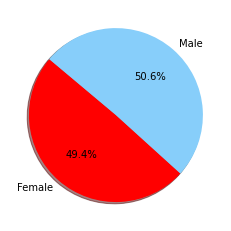

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Labels for the sections of our pie chart
labels = ["Female", "Male"]

# The values of each section of the pie chart
sizes = [len(female_df), len(male_df)]

# The colors of each section of the pie chart
colors = ["red", "lightskyblue"]

explode = (0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = combined_data.loc[combined_data['Drug Regimen'] == "Capomulin", :]
Capomulin_df.head()

Ramicane_df = combined_data.loc[combined_data['Drug Regimen'] == "Ramicane", :]
Ramicane_df.head()

Infubinol_df = combined_data.loc[combined_data['Drug Regimen'] == "Infubinol", :]
Infubinol_df.head()

Ceftamin_df = combined_data.loc[combined_data['Drug Regimen'] == "Ceftamin", :]
Ceftamin_df.head()

four_mice_df = pd.merge(Ramicane_df, pd.merge(Capomulin_df, pd.merge(Infubinol_df, Ceftamin_df, how="outer"), how="outer"), how="outer")

pd.merge(Infubinol_df, Ceftamin_df, how="outer")

mouse_grp = four_mice_df.groupby(['Drug Regimen'])

# Start by getting the last (greatest) timepoint for each mouse
mouse_grp_df = pd.DataFrame(mouse_grp['Timepoint'].max())

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data = pd.merge(combined_data,mouse_grp_df, how='right', on='Drug Regimen')

final_tumor_df = merged_data.loc[merged_data['Timepoint_x']==merged_data['Timepoint_y']]
final_tumor_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume,Metastatic Sites,Timepoint_y
9,k403,Ramicane,Male,21,16,45,22.050126,1,45
19,g791,Ramicane,Male,11,16,45,29.128472,1,45
29,s508,Ramicane,Male,1,17,45,30.276232,0,45
39,m546,Ramicane,Male,18,16,45,30.564625,1,45
49,z578,Ramicane,Male,11,16,45,30.638696,0,45
...,...,...,...,...,...,...,...,...,...
772,w151,Ceftamin,Male,24,25,45,67.527482,3,45
783,x581,Ceftamin,Female,19,28,45,64.634949,3,45
793,x822,Ceftamin,Male,3,29,45,61.386660,3,45
803,y769,Ceftamin,Female,6,27,45,68.594745,4,45


In [57]:
# Put treatments into a list for for loop (and later for plot labels)
Treatments = four_mice_df['Drug Regimen']

# Create empty list to fill with tumor vol data (for plotting)
Tumor_Volume = four_mice_df['Tumor Volume']

# Calculate the IQR and quantitatively determine if there are any potential outliers.
quartile = Tumor_Volume.quantile([.25,.5,.75])
lowerq = quartile[0.25]
medianq = quartile[0.5]
upperq = quartile[0.75]
iqr = upperq-lowerq

print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile  is: {upperq}")
print(f"The interquartile range is: {iqr}")
print(f"The the median is: {medianq} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile is: 40.2201707875
The upper quartile  is: 50.356470630000004
The interquartile range is: 10.136299842500001
The the median is: 45.0 
Values below 25.01572102375 could be outliers.
Values above 65.56092039375001 could be outliers.


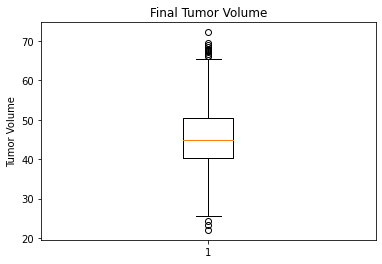

In [56]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Example outlier plot of reaction times
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(Tumor_Volume)
plt.show()

## Line and Scatter Plots

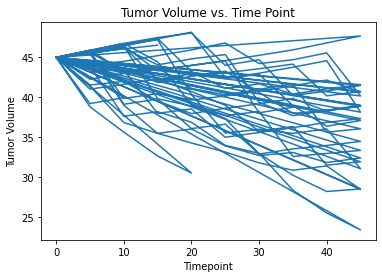

In [67]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

Capomulin_df = combined_data.loc[combined_data['Drug Regimen'] == "Capomulin", :]
Capomulin_df.head()

mouse_df = Capomulin_df.loc[Capomulin_df['Mouse ID'] == 0]

#x = np.linspace(-1, 1, 50)
x = Capomulin_df['Tumor Volume']
y1 = Capomulin_df['Timepoint']

plt.figure()
plt.plot(y1, x)  

plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume vs. Time Point")

plt.show()

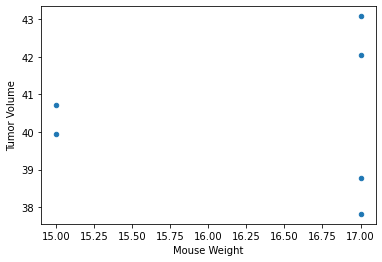

In [26]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#create a data frame holding only the Capomulin data
Capomulin_df = combined_data.loc[combined_data['Drug Regimen'] == "Capomulin", :]
Capomulin_df.head()

time_grp = Capomulin_df.groupby(['Timepoint'])
time_df = pd.DataFrame(time_grp['Tumor Volume'].mean())

scat_df = pd.DataFrame({'Mouse Weight' : Capomulin_df['Weight (g)'],
                        'Tumor Volume' : time_df['Tumor Volume']})

y = scat_df.plot.scatter(x='Mouse Weight', y='Tumor Volume')






#create 

#The maximum x value for our chart will be 100
#x_limit = 80

# List of values from 0 to 80 each value being 1 greater than the last
#x_axis = np.arange(0, x_limit, 1)

# Create a random array of data that we will use for our y values
#data = [random.random() for value in x_axis]

# Tells matplotlib that we want to make a scatter plot
# The size of each point on our plot is determined by their x value
#plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black",
#            s=x_axis, alpha=0.75)

## Correlation and Regression

In [29]:
#  the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

Mouse_Weight = combined_data.iloc[:,1]
Tumor_Volume = combined_data.iloc[:,8]
correlation = st.pearsonr(Mouse_Weight,Tumor_Volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")


# Add the linear regression equation and line to plot

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)


#Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Weight')
plt.ylabel('Tumor Volume')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

IndexError: single positional indexer is out-of-bounds